# <center> Chaînes de Markov et art génératif

L'art génératif désigne divers procédés de génération artistique impliquant l'utilisation d'algorithmes éxécutés par une machine.  
Le philosophe japonais Hiroshi Kawano (1925-2012) est connu comme étant l'un des pionniers dans ce domaine.  
En effet, dans les années 60 Kawano fut l'un des premiers à utiliser de tels processus pour générer certaines de ses oeuvres à l'aide de l'OKITAC 5090A de l'université de Tokyo, en voici un exemple tiré de la série *Design* inspirée des *Compositions* de Piet Mondrian : 

<img src=" Design 3-1. Data 4, 5, 6, 6, 6 [Design 1-4. Data 1, 2, 3, 3, 3].jpg" width="320" height="240"/>
    
Chaque ligne de carrés de ce tableau représente en fait les états une chaîne de Markov à 5 états : blanc, noir, rouge, bleu et jaune.  
La couleur du premier carré de chaque ligne est donc générée aléatoire à partir de la distribution initiale $\pi_0$ tandis que la couleur suivante est déterminée à partir d'une matrice de transition $P$ prédéfinie, nous allons à présent reproduire ce processus.


In [1]:
from numpy import array, zeros, uint8, dot
from random import randint
from numpy.random import choice # choice(valeurs, p) genere valeurs[k] avec probabilite p[k]
from matplotlib.image import imsave
import matplotlib.pyplot as plt

# definition des couleurs en RGB
blanc = (253, 252, 247)
bleu = (72, 76, 231)
rouge = (236, 31, 37)
jaune = (249, 226, 25)
noir = (34, 34, 34)
couleurs = [blanc, bleu, rouge, jaune, noir] 

# matrice de transition
#          blanc, bleu, rouge, jaune, noir
P = array([[0.8 , 0.05,  0.05,  0.05, 0.05],  #blanc
           [0.05, 0.8 ,  0.05,  0.05, 0.05],  #bleu
           [0.05, 0.05,  0.8 ,  0.05, 0.05],  #rouge
           [0.05, 0.05,  0.05,  0.8 , 0.05],  #jaune
           [0.05, 0.05 , 0.05,  0.05, 0.8 ] ]) #noir

Par exemple si le premier carré est rouge, on a l'état $E_0 = \begin{pmatrix} 0 & 0 & 1 & 0 & 0 \end{pmatrix}$  
La loi de probabilité permettant de générer $E_1$ est alors donnée par :  
$$E_0 \times P =  \begin{pmatrix} 0 & 0 & 1 & 0 & 0 \end{pmatrix} \times \begin{pmatrix} 0.8 & 0.05 &  0.05 &  0.05 &  0.05 \\
            0.05 & 0.8  &  0.05 &  0.05 & 0.05 \\
            0.05 & 0.05 &  0.8  &  0.05 & 0.05 \\
            0.05 & 0.05 &  0.05 &  0.8  & 0.05 \\
            0.05 & 0.05  & 0.05 &  0.05 & 0.8 \end{pmatrix} = \begin{pmatrix} 
            0.05 & 0.05 &  0.8  &  0.05 & 0.05 \end{pmatrix}$$
            
On aura donc à nouveau du rouge dans $80\%$ des cas et chacune des autres couleurs avec une probabilité de $5\%$ chacune.

Si la valeur aléatoire générée correspond à la couleur jaune, on aura alors $E_1 = \begin{pmatrix} 0 & 0 & 0 & 1 & 0 \end{pmatrix}$.  
On répète alors ce procédé jusqu'à obtenir la couleur du dernier carré de la ligne.

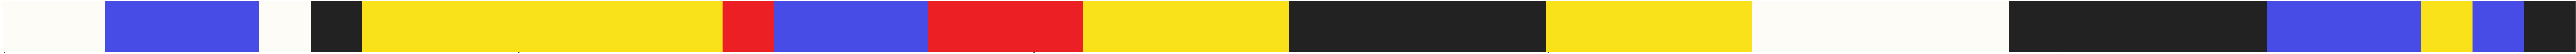

In [4]:
# nombre de carres par ligne
n = 50
# longueur de cote d'un carre
taille = 10

# image vide de dimension 10x500 (10 lignes de 500 pixels)
Kawano_img = zeros((taille, n * taille, 3), dtype = uint8)

# etat initial defini comme etant (0 0 0 0 0)
Etat = array([0, 0, 0, 0, 0])

# on prend comme distribution initiale la loi uniforme :
n_couleur = randint(0, 4)
# on affecte a la colonne correspondante la valeur 1
Etat[n_couleur] = 1
# on colorie le premier carre de pixels de taille 10x10  avec la couleur associee
Kawano_img[0 : taille, 0 : taille] = couleurs[n_couleur]

# boucle parcourant les colonnes
for j in range(n) :
    # calcul de la matrice ligne des probabilites d'atteindre chaque couleur : 
    probabilites = Etat.dot(P)
    # generation aleatoire de la couleur associee a l'aide de la loi de probabilites precedente
    n_couleur = choice([0, 1, 2, 3, 4], p = probabilites)
    # on colorie le j-eme carre de pixel de taille 10x10
    Kawano_img[0 : taille, j * taille : (j + 1) * taille] = couleurs[n_couleur]
    # reinitialisation de l'etat probabiliste
    Etat = array([0, 0, 0, 0, 0])
    # on redefinit l'etat probabiliste a partir de la couleur obtenue
    Etat[n_couleur] = 1

plt.imshow(Kawano_img)
plt.rcParams["figure.figsize"] = (10,500)
plt.show()

Nous avons donc réussi à générar une ligne de carrés de couleur à partir d'un état initial aléatoire (carré de pixel de gauche) et de la matrice de transition $P$.
Pour générer une image complète, il reste juste à générer d'autres lignes de la même manière en changeant les dimensions de l'image et en rajoutant une boucle :

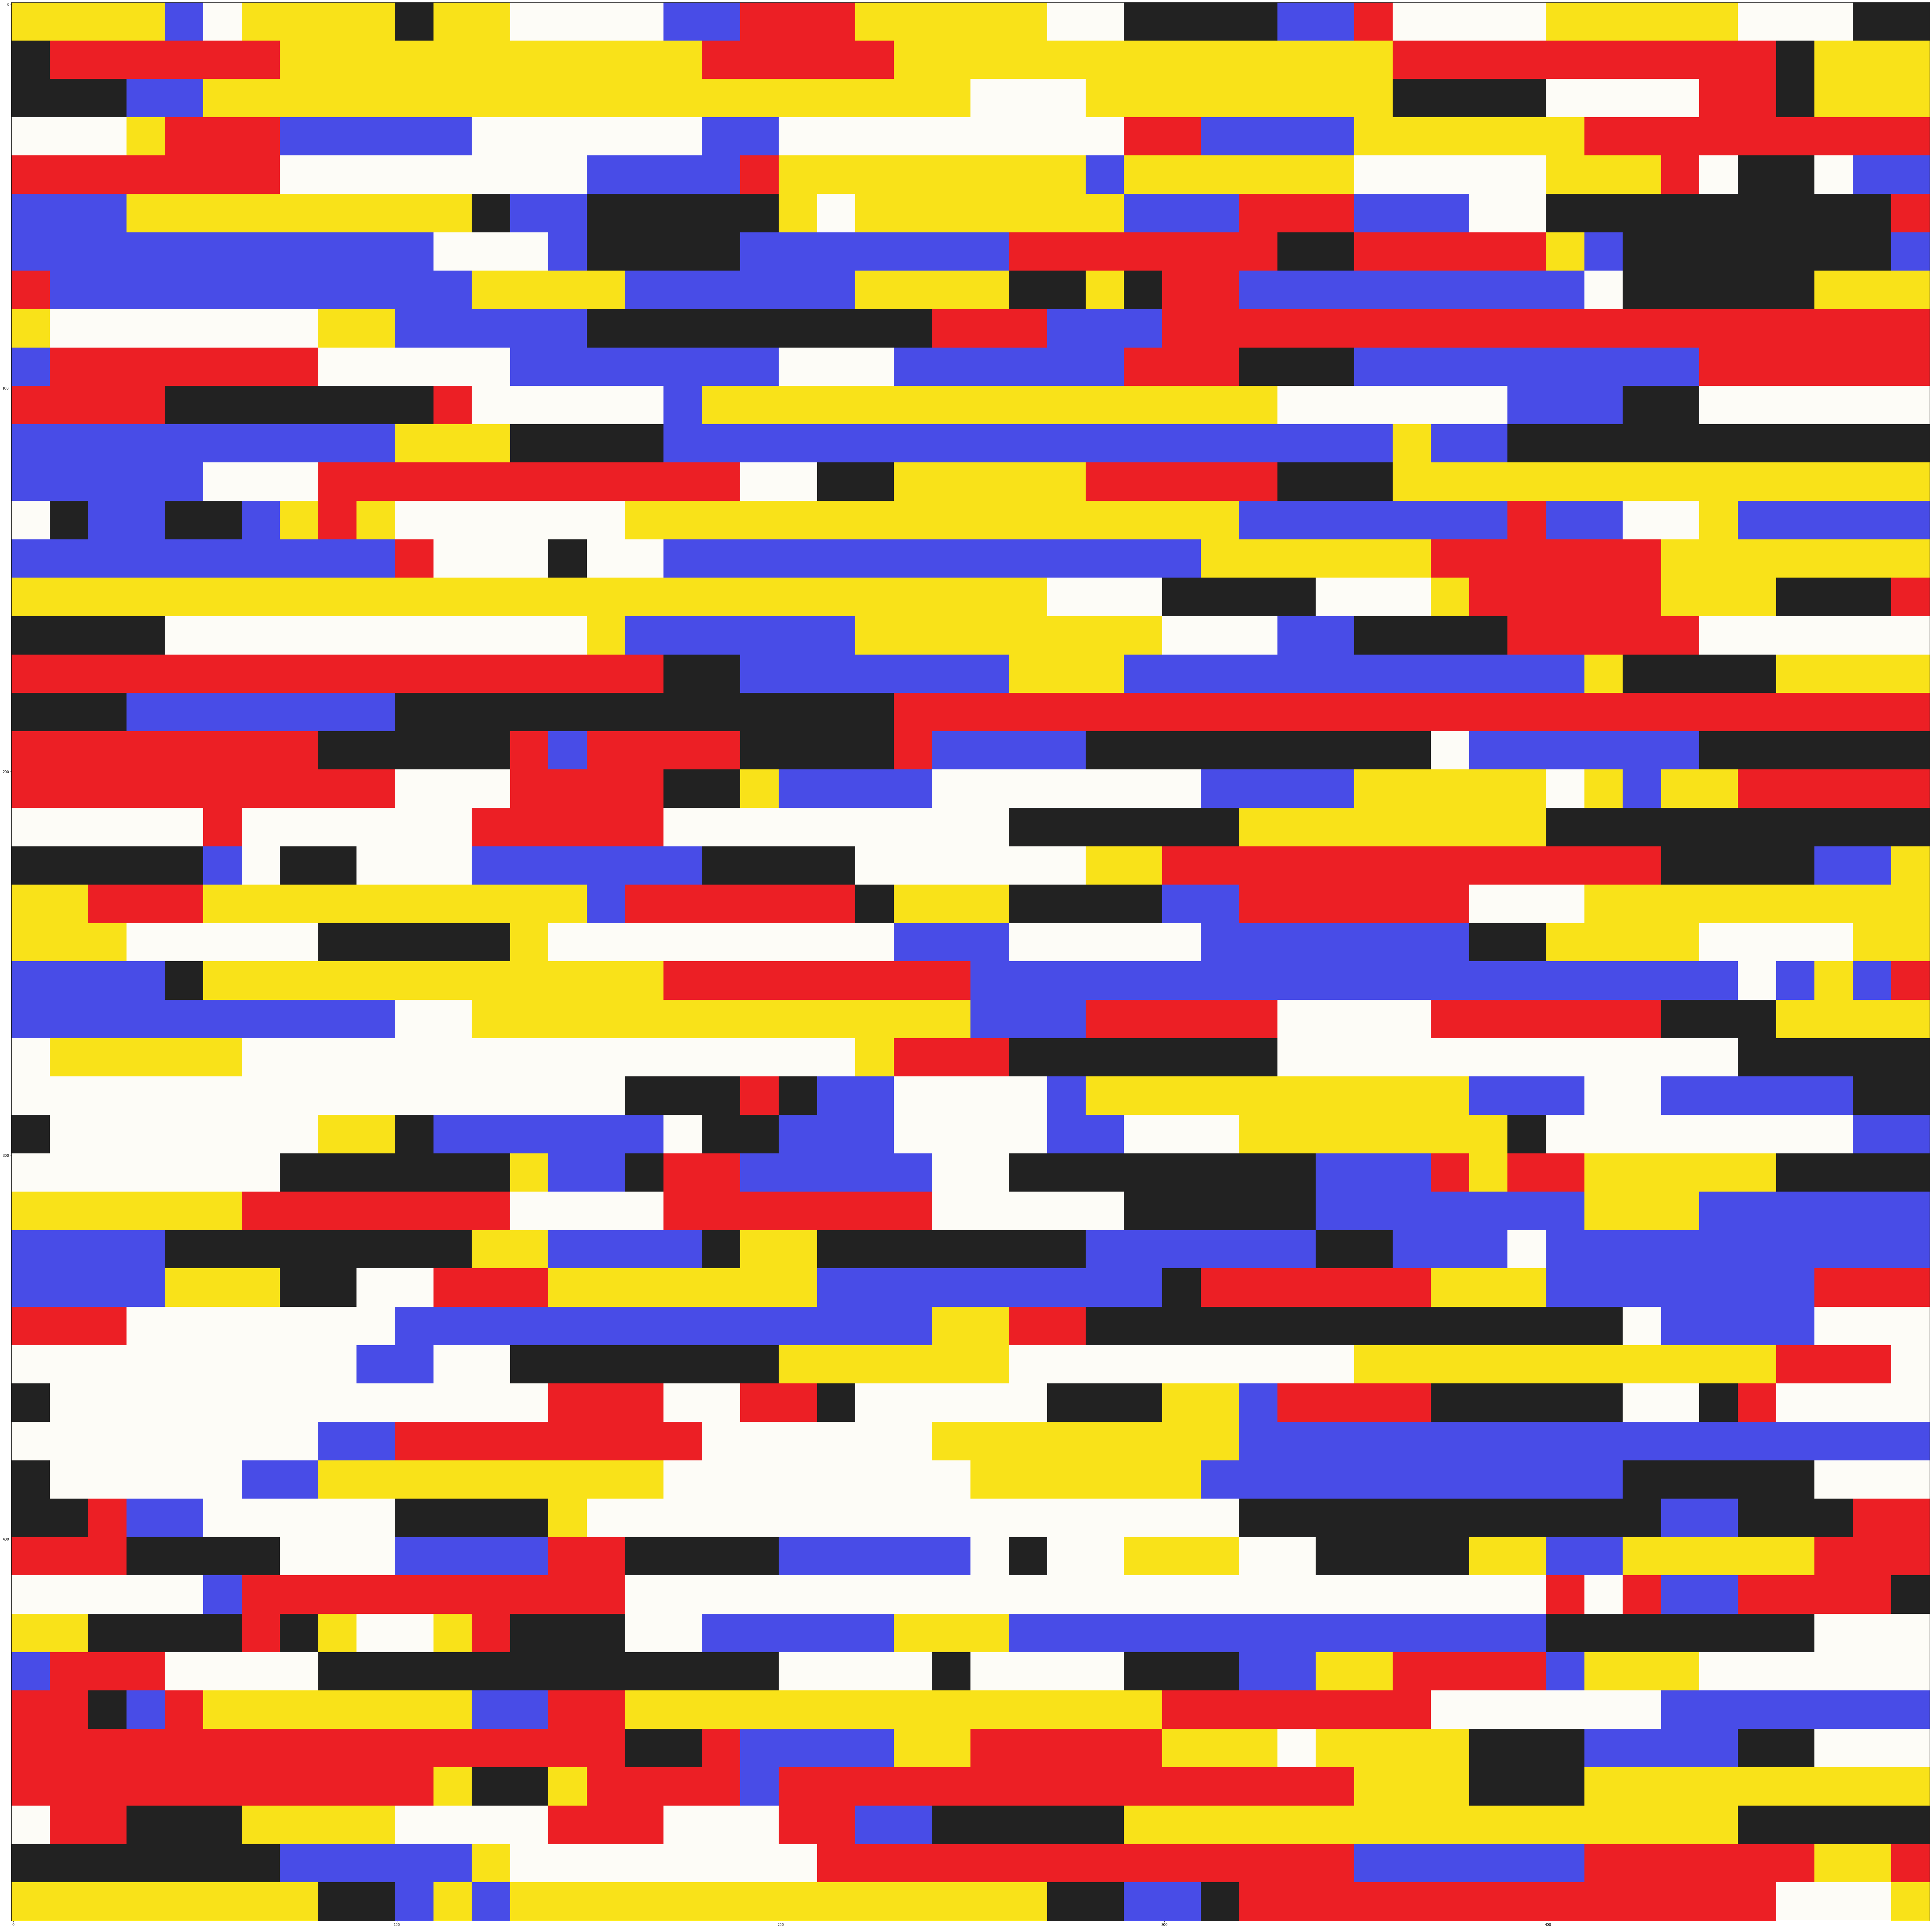

In [3]:
# image vide de dimension 500x500
Kawano_img = zeros((n * taille, n * taille, 3), dtype = uint8)

# liste des etats initiaux pour chaque ligne de carres definis comme etant (0 0 0 0 0)
Etat = [array([0, 0, 0, 0, 0]) for k in range(n)]

# boucle parcourant les etats initiaux de chaque ligne 
for i in range(n) :
    # on choisit aleatoirement un entier entre 0 et 4 avec equiprobabilite
    couleur = randint(0, 4)
    # on affecte a la colonne correspondante la valeur 1
    Etat[i][couleur] = 1
    # on colorie le k-eme carre de pixels avec la couleur associee
    Kawano_img[i * taille : (i + 1) * taille, 0 : taille] = couleurs[couleur]
    # Kawano_img[a : b, c : d] designe tous les pixels de l'image entre les lignes a et b et les colonnes c et d

# boucle parcourant les lignes
for i in range(n) :
    # boucle parcourant les colonnes
    for j in range(n) :
        # calcul de la matrice ligne des probabilites d'atteindre chaque couleur : 
        probabilites = Etat[i].dot(P)
        # generation aleatoire de la couleur associee a l'aide de la loi de probabilites precedente
        couleur = choice([0,1,2,3,4], p = probabilites)
        # on colorie le carre de pixel i, j
        Kawano_img[i * taille : (i + 1) * taille, j * taille : (j + 1) * taille] = couleurs[couleur]
        # on redefinit l'etat probabiliste de la ligne i a partir de la couleur obtenue
        Etat[i] = array([0, 0, 0, 0, 0]) 
        Etat[i][couleur] = 1

plt.imshow(Kawano_img)
plt.rcParams["figure.figsize"] = (500,500)
plt.show()
imsave("Kawano_Markov" + str(n) + ".png", Kawano_img)